# ARIMA

### Dataset used in daily temperature change provided on GC

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as mtp 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss , acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as best_arima_finder 

In [14]:
data = pd.read_csv("daily-minimum-temperatures-in-me.csv")

In [15]:
data.head(5)

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3650 non-null   object 
 1   Daily minimum temperatures  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB
None


In [17]:
print(data.describe())

       Daily minimum temperatures
count                 3650.000000
mean                    11.177753
std                      4.071837
min                      0.000000
25%                      8.300000
50%                     11.000000
75%                     14.000000
max                     26.300000


In [18]:
print(data.isnull().sum())

Date                          0
Daily minimum temperatures    0
dtype: int64


So we can say that this data does't have any null values and is further okay for time series analysis and arima prediction

In [19]:
type(data.index)

pandas.core.indexes.range.RangeIndex

### Now we will perform AD-Fuller and KPSS test to check if the given series is stationary or not . 
For not being stationary it musnt have any relation with periodicity 

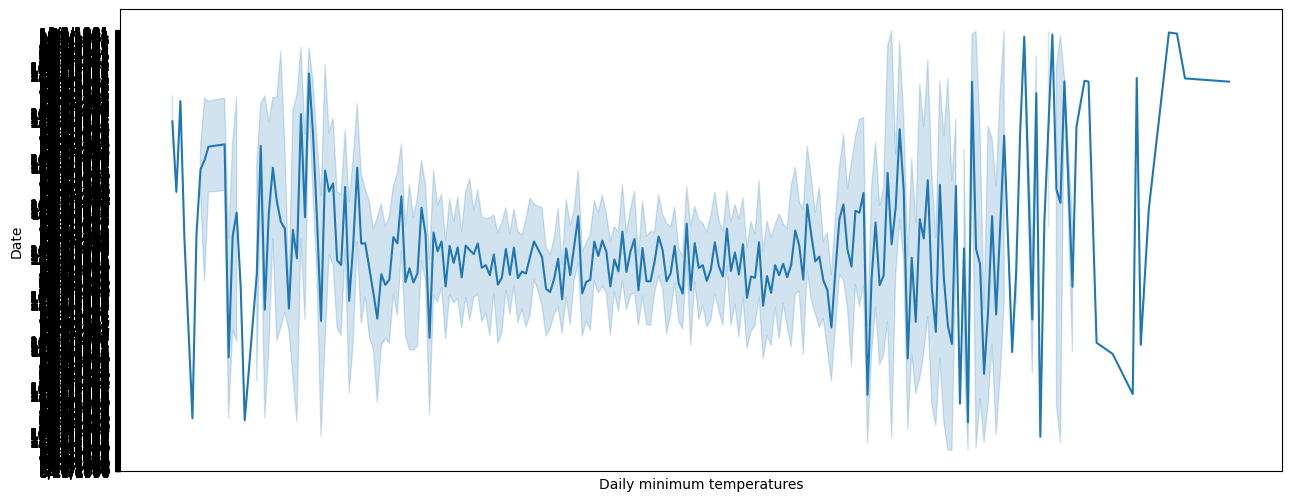

In [20]:
fig=mtp.figure(figsize=(15,6))
sns.lineplot(data=data,x='Daily minimum temperatures',y='Date')
mtp.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
mtp.show()

In [25]:
adf2 = adfuller(data['Daily minimum temperatures'])
print("Test Statistic " , adf2[0])
print("p-value " , adf2[1])
print("Critical Values")
for i,j in adf2[4].items():
    print('\t%s: %.3f' %(i, j))
    if adf2[0] < j :
        print(" THe data is stationary")

Test Statistic  -4.444804924611684
p-value  0.0002470826300361156
Critical Values
	1%: -3.432
stationary
	5%: -2.862
stationary
	10%: -2.567
stationary


As the ADF test statics is lesser (more negative) then the critical value becomes the reason to reject the null hypothesis. This indicates that the data is stationary.

In [27]:
kpss_result = kpss(data['Daily minimum temperatures'], regression="ct")
print("\nKPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
print("Critical Values:")
for key, value in kpss_result[3].items():
    print(f"\t{key}: {value}")
    if adf2[0] > j :
        print(" THe data is stationary")


KPSS Statistic: 0.04923280051852443
p-value: 0.1
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/var/folders/ys/f1dtzjmj589424_wn9_wp8t80000gn/T/ipykernel_48982/2118624302.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(data['Daily minimum temperatures'], regression="ct")


As the KPSS test statistics value is less than the critical value, the null hypothesis is not rejected. This indicates that the data is stationary

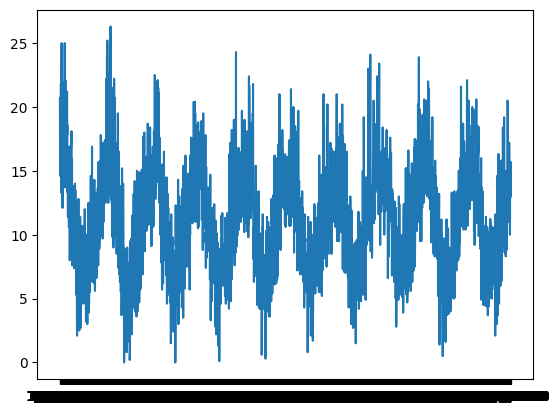

In [31]:
mtp.plot(data['Date'],data['Daily minimum temperatures'],label="after")

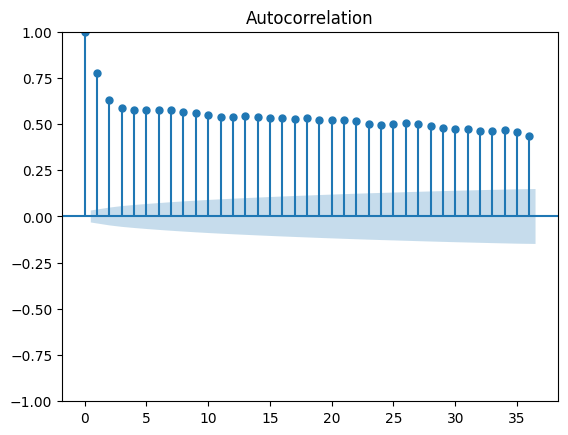

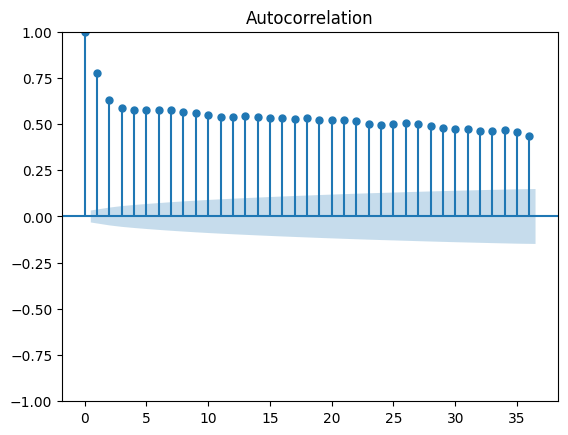

In [33]:
plot_acf(data['Daily minimum temperatures'])

In [34]:
model = ARIMA(data['Daily minimum temperatures'] , order = (1,1,1))
model_fit = model.fit()
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                   SARIMAX Results                                    
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3650
Model:                         ARIMA(1, 1, 1)   Log Likelihood               -8413.583
Date:                        Wed, 20 Mar 2024   AIC                          16833.165
Time:                                23:59:03   BIC                          16851.772
Sample:                                     0   HQIC                         16839.792
                                       - 3650                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4630      0.017     26.538      0.000       0.429       0.497
ma.L1         -0.9204      0.008   -111.103      0.000      -0.937 

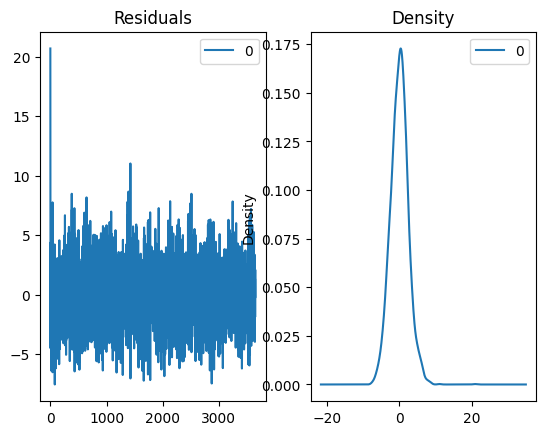

In [35]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = mtp.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
mtp.show()

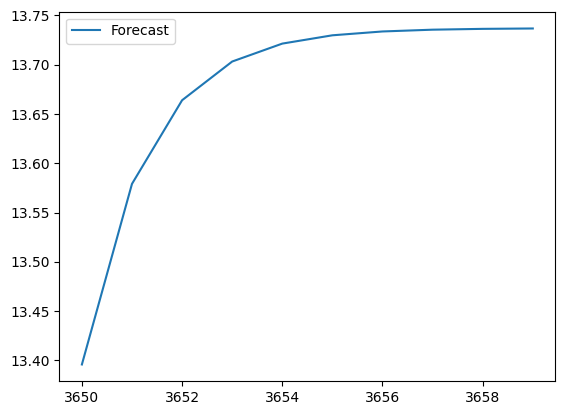

In [36]:
forecast = model_fit.forecast(steps=10)  # Adjust the number of steps as needed
mtp.plot(forecast, label='Forecast')
mtp.legend()
mtp.show()

In [60]:
train = data['Daily minimum temperatures']
test = data['Daily minimum temperatures']

In [67]:
forecast_results = model_fit.get_forecast(steps=2094, alpha=0.05)  # 95% confidence interval
fc = forecast_results.predicted_mean

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [69]:
# using pmdarima for finding the best arima modeL
model_2 = best_arima_finder.auto_arima(
    data['Daily minimum temperatures'] , 
    start_p= 1 , 
    start_q = 1 , 
    test= "kpss" , 
    max_p=3,
    max_q=3,
    d = None , 
    trace = True , 
    seasonal= False , 
    error_action= "ignore" , 
    suppress_warnings= True , 
    stepwise= True
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=17368.986, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28436.596, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=17652.487, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=24521.185, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=16842.806, Time=0.78 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=17547.473, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=16790.341, Time=0.87 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=17304.999, Time=0.51 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=16835.941, Time=1.70 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=16793.435, Time=1.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16777.600, Time=2.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16831.033, Time=1.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17113.438, Time=0.78 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16780.317, Time=3.03 sec
 ARIMA(2,0,0)(0,0,0

In [70]:
print(model_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3650
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -8382.800
Date:                Thu, 21 Mar 2024   AIC                          16777.600
Time:                        00:12:49   BIC                          16814.815
Sample:                             0   HQIC                         16790.853
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0562      0.018      3.127      0.002       0.021       0.091
ar.L1          1.4851      0.018     80.343      0.000       1.449       1.521
ar.L2         -0.6204      0.027    -23.368      0.0

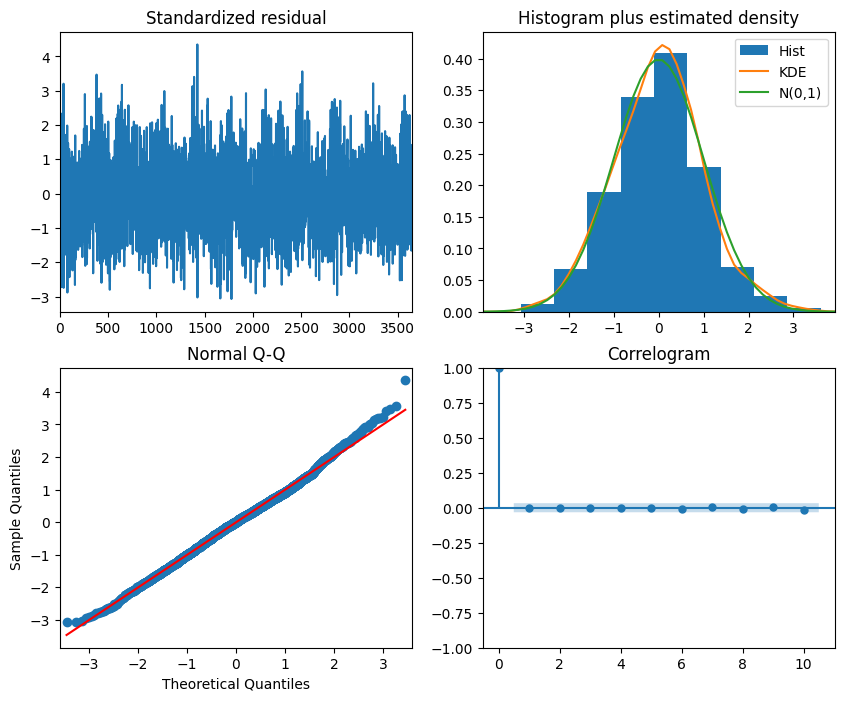

In [71]:
model_2.plot_diagnostics(figsize=(10,8))
mtp.show()

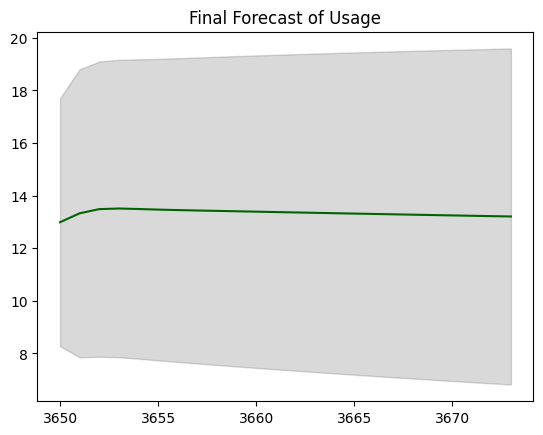

In [75]:
n_periods = 24
fc, confint = model_2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data.values), len(data.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
# mtp.plot(data['Daily minimum temperatures'])
mtp.plot(fc_series, color='darkgreen')
mtp.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

mtp.title("Final Forecast of Usage")
mtp.show()

In [78]:

data = data.reset_index(drop=True)
# Make predictions on the test data using the best ARIMA model
y_pred = model_2.predict(len(data))

# Calculate the metrics
mae = mean_absolute_error(data['Daily minimum temperatures'], y_pred)
mse = mean_squared_error(data['Daily minimum temperatures'], y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(data['Daily minimum temperatures'], y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 3.283758807273428
Mean Squared Error (MSE): 16.460798468958966
Root Mean Squared Error (RMSE): 4.057190957911517
Mean Absolute Percentage Error (MAPE): 28355550230894.953


In [81]:
arima_pred = model_fit.predict(start = 1, end = len(data)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1       20.699959
2       18.638794
3       19.090724
4       16.319483
5       16.791719
          ...    
3645    14.158830
3646    13.868416
3647    13.661871
3648    13.602692
3649    14.788116
Name: ARIMA Predictions, Length: 3649, dtype: float64

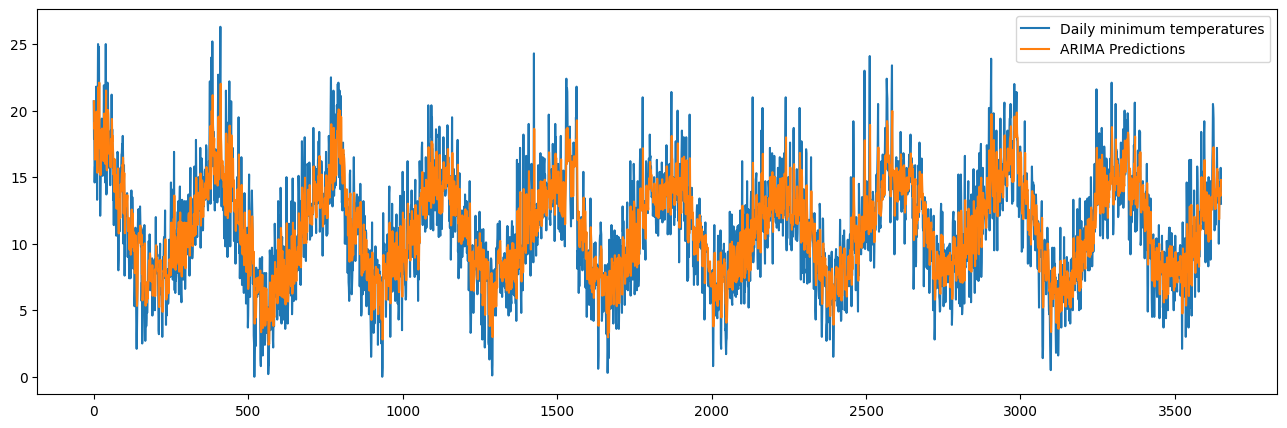

In [82]:
data['Daily minimum temperatures'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);